In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Useful information

[Styling plots for publication with matplotlib](http://jonchar.net/notebooks/matplotlib-styling/)<br>
[Effectively Using Matplotlib](http://pbpython.com/effective-matplotlib.html) - nice explanation of object oriented interface

# Use Log axis or axes

/Users/nordin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/nordin/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


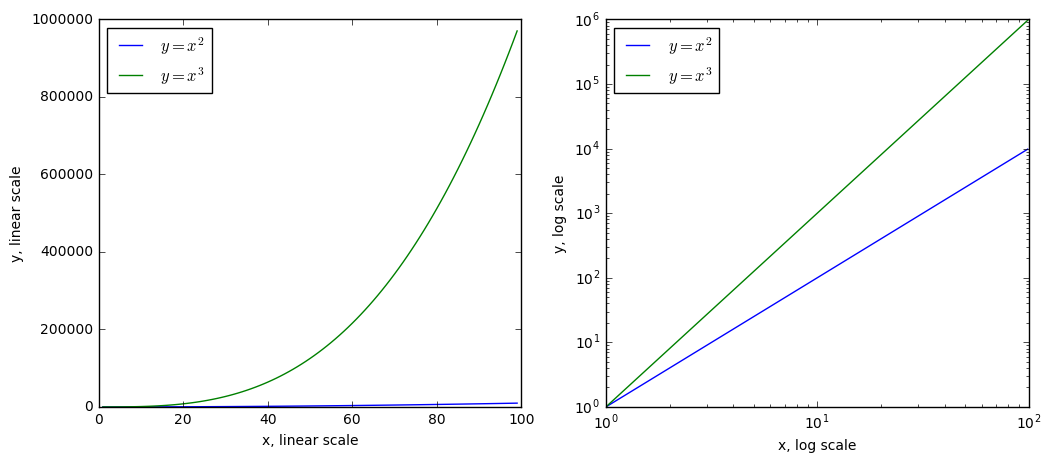

In [2]:
x = np.arange(1, 100)
y2 = pow(x, 2)
y3 = pow(x, 3)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(x, y2, label='$y=x^2$')
ax1.plot(x, y3, label='$y=x^3$')
ax1.set_xlabel('x, linear scale')
ax1.set_ylabel('y, linear scale')
ax1.legend(loc='upper left')

ax2.set_xscale("log", nonposx='clip') # this will clip negative values, usually not needed
ax2.set_yscale("log", nonposy='clip') # this will clip negative values, usually not needed
ax2.plot(x, y2, label='$y=x^2$')
ax2.plot(x, y3, label='$y=x^3$')
ax2.set_xlabel('x, log scale')
ax2.set_ylabel('y, log scale')
ax2.legend(loc='upper left');

# Put legend outside plot

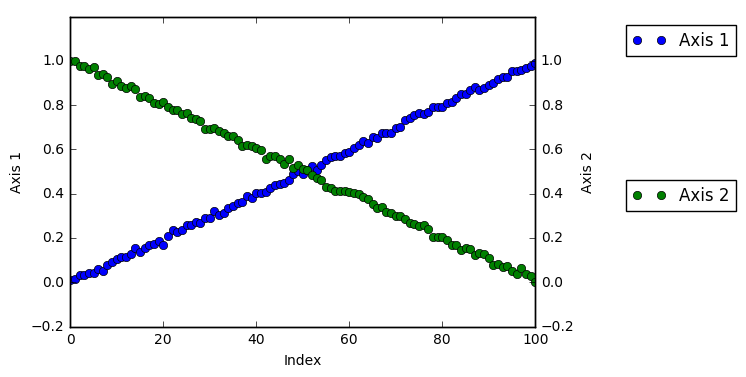

In [3]:
x = np.linspace(0, 100, num=101)
y1 = 0.01*x + np.random.normal(0, 0.01, len(x))
y2 = 1 - 0.01*x + np.random.normal(0, 0.01, len(x))

fig, ax = plt.subplots(figsize=(10,4))
ax2 = ax.twinx()
# Shrink current axis by 40%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.6, box2.height])

ax.plot(x, y1, 'o', label='Axis 1')
ax2.plot(x, y2, 'o', color='g', label='Axis 2')

ax.set_ylim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)

ax.set_xlabel('Index')
ax.set_ylabel('Axis 1')
ax2.set_ylabel('Axis 2')

ax.legend(bbox_to_anchor=(1.45, 1.0))
ax2.legend(bbox_to_anchor=(1.45, 0.5))

# One legend for two vertical axis

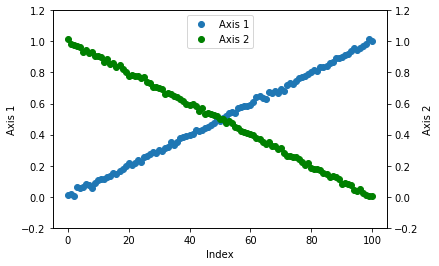

In [4]:
x = np.linspace(0, 100, num=101)
y1 = 0.01*x + np.random.normal(0, 0.01, len(x))
y2 = 1 - 0.01*x + np.random.normal(0, 0.01, len(x))

fig, ax = plt.subplots()
ax2 = ax.twinx()

ax.plot(x, y1, 'o', label='Axis 1')
ax2.plot(x, y2, 'o', color='g', label='Axis 2')

ax.set_ylim(-0.2, 1.2)
ax2.set_ylim(-0.2, 1.2)

ax.set_xlabel('Index')
ax.set_ylabel('Axis 1')
ax2.set_ylabel('Axis 2')

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Always use last axis's legend command
ax2.legend(lines + lines2, labels + labels2, loc='upper center') 

# Get line color

## Method 1: `var = ax.plot()`

- Set a variable equal to ax.plot(): `var = ax.plot(...)`
- The variable is a list with 1 element, which is a Line2D object
- Execute get_color() method on that the Line2D object: `color = var[0].get_color()`

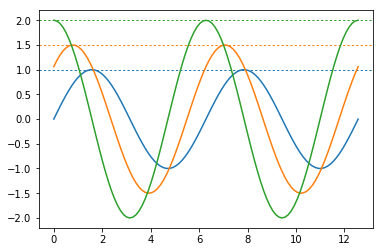

In [10]:
xx = np.linspace(0, 4 * np.pi, 101)
data0 = np.sin(xx)
data1 = 1.5 * np.sin(xx + np.pi/4)
data2 = 2 * np.sin(xx + np.pi/2)
data = [data0, data1, data2]
fig, ax = plt.subplots()
for d in data:
    l = ax.plot(xx, d)
    color = l[0].get_color()
    ax.axhline(max(d), c=color, linestyle=':', linewidth=1)

## Method 2: `ax.lines`

- After plotting all of the desired lines, `ax.lines` contains a list of the corresponding Line2D objects in the order they were added to the plot.
- The color for the $i^{th}$ Line2D object is `ax.lines[i].get_color()`

Line2D(Line 0) #1f77b4
Line2D(Line 1) #ff7f0e
Line2D(Line 2) #2ca02c


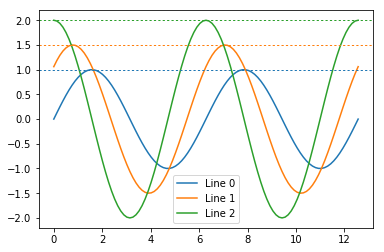

In [17]:
xx = np.linspace(0, 4 * np.pi, 101)
data0 = np.sin(xx)
data1 = 1.5 * np.sin(xx + np.pi/4)
data2 = 2 * np.sin(xx + np.pi/2)
data = [data0, data1, data2]
fig, ax = plt.subplots()
for i, d in enumerate(data):
    ax.plot(xx, d, label='Line {}'.format(i))
for line in ax.lines:
    print(line, line.get_color())
for d, line in zip(data, ax.lines):
    ax.axhline(max(d), c=line.get_color(), linestyle=':', linewidth=1)
ax.legend();

In [15]:
for line in ax.lines:
    print(line, line.get_color())

Line2D(0) #1f77b4
Line2D(1) #ff7f0e
Line2D(2) #2ca02c
Line2D(_line3) #1f77b4
Line2D(_line4) #ff7f0e
Line2D(_line5) #2ca02c


# Using `subplot2grid` - different sized subplots

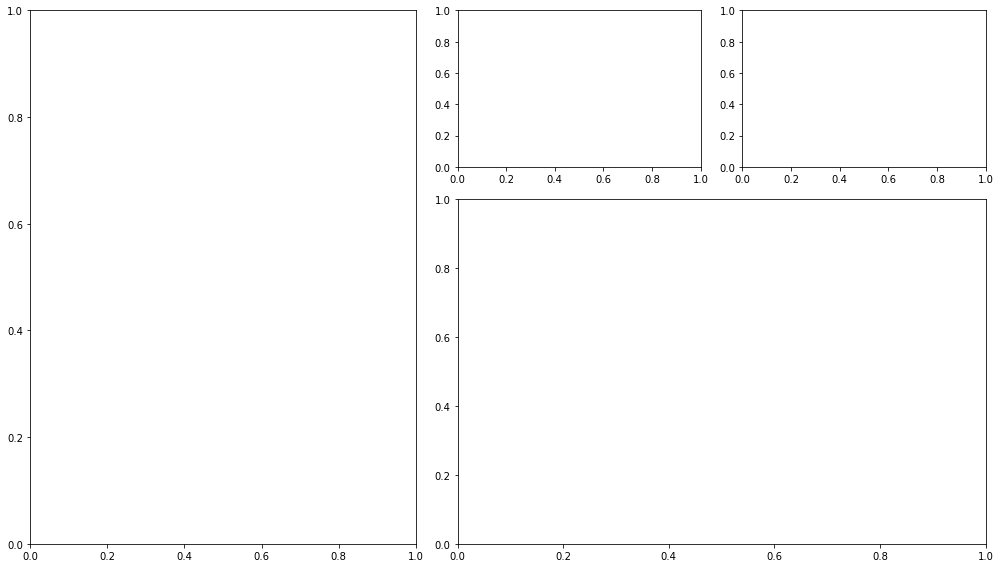

In [6]:
fig = plt.figure(figsize=(14,8))
ax1 = plt.subplot2grid((3, 7), (0, 0), colspan=3, rowspan=3)
ax2 = plt.subplot2grid((3, 7), (0, 3), colspan=2)
ax3 = plt.subplot2grid((3, 7), (0, 5), colspan=2)
ax4 = plt.subplot2grid((3, 7), (1, 3), colspan=4, rowspan=2)
plt.tight_layout()

# Prevent default use of offset for axis tick labels

## Example of the problem

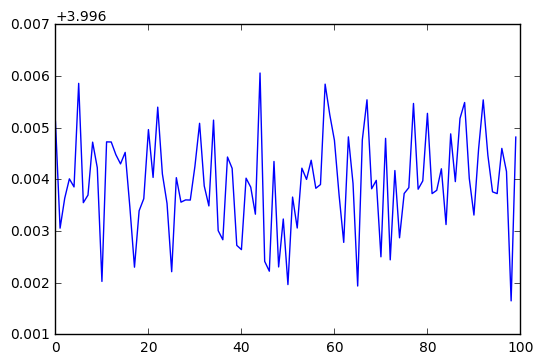

In [4]:
noise = np.random.normal(0, 0.001, 100)
signal = 4.0 + noise

fig, ax = plt.subplots()
ax.plot(signal);

## Solution

See Dataman's comment to the solution at [format axis offset-values to whole numbers or specific number](http://stackoverflow.com/questions/3677368/matplotlib-format-axis-offset-values-to-whole-numbers-or-specific-number)

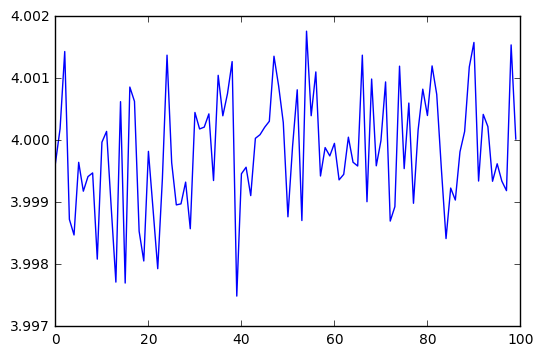

In [5]:
noise = np.random.normal(0, 0.001, 100)
signal = 4.0 + noise

fig, ax = plt.subplots()
ax.plot(signal)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Don't use scientific notation in axis tick labels

## Example of the problem

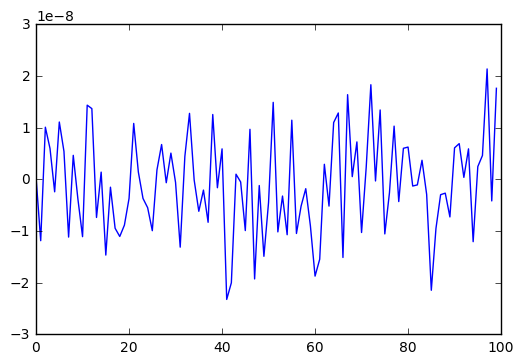

In [6]:
y = np.random.normal(0, 1e-8, 100)
fig, ax = plt.subplots()
ax.plot(y);

## Solution

See answer to [How to prevent numbers being changed to exponential form in Python matplotlib figure](http://stackoverflow.com/questions/14711655/how-to-prevent-numbers-being-changed-to-exponential-form-in-python-matplotlib-fi)

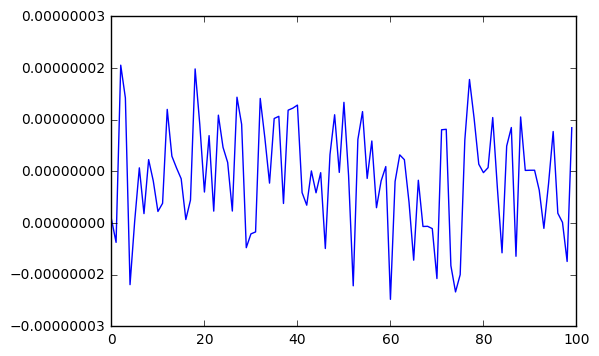

In [7]:
y = np.random.normal(0, 1e-8, 100)
fig, ax = plt.subplots()
ax.plot(y)
ax.get_yaxis().get_major_formatter().set_scientific(False)

# Eliminate some subplots in an array of subplots

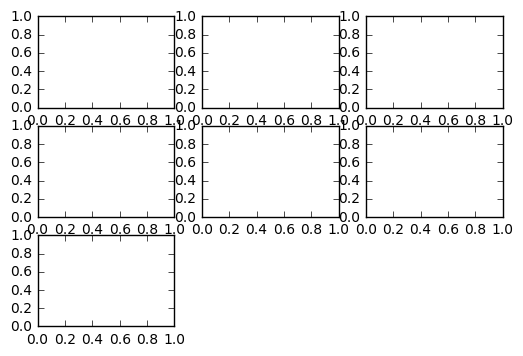

In [8]:
fig, axs  = plt.subplots(3,3)
fig.delaxes(axs[-1, -1])
fig.delaxes(axs[-1, -2])

# Plot an array of images as a set of subplots

Images are slices of a 3D numpy array

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
15 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
4 4


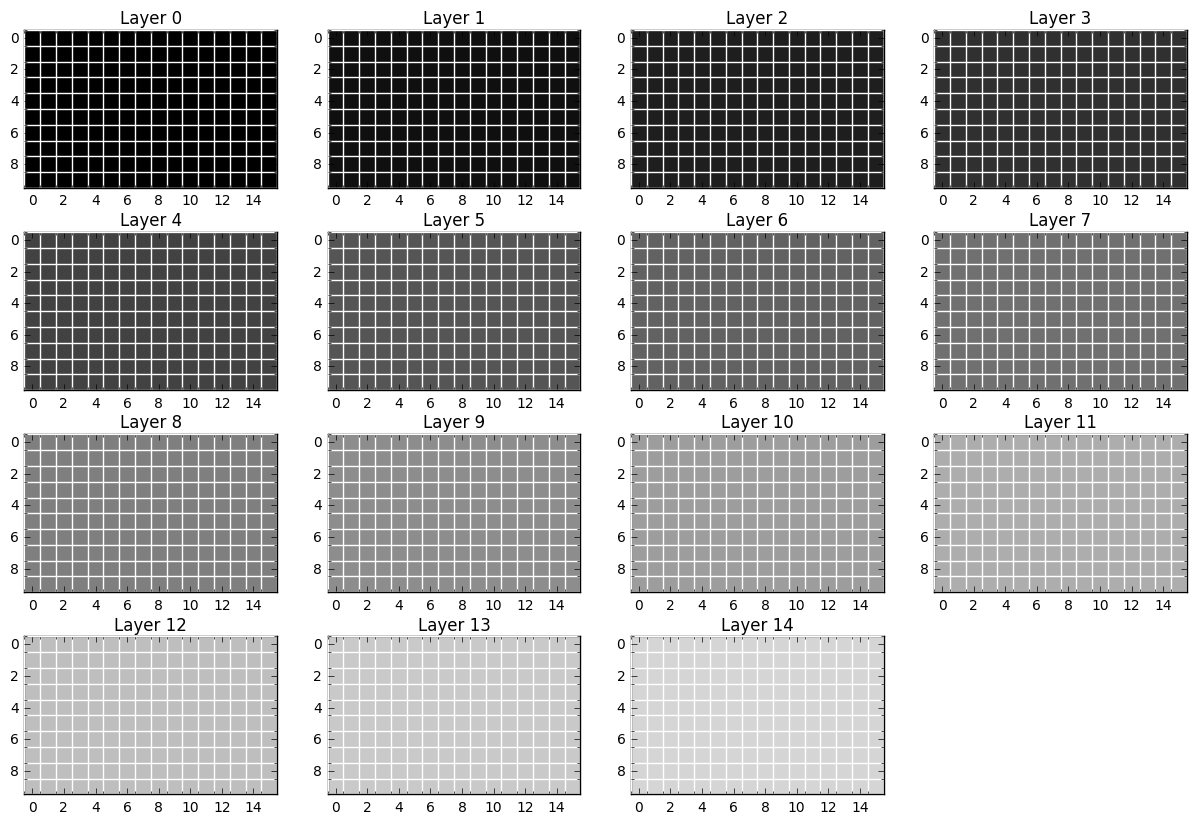

In [6]:
def _layer_image(image, ax, layer, show_grid_lines = False):
    ax.imshow(image[:,:,layer], interpolation="None", cmap="Greys_r", vmin = 0, vmax = 255 )
    ax.set_title("Layer {}".format(layer))
    if show_grid_lines:
        # Minor ticks
        ax.set_xticks(np.arange(-.5, image.shape[1], 1), minor=True);
        ax.set_yticks(np.arange(-.5, image.shape[0], 1), minor=True);
        # Gridlines based on minor ticks
        ax.grid(which='minor', color='w', linestyle='-', linewidth=1)
    else:
        ax.set_axis_off()


def show_multiple_layers(layers, num_cols, image, show_grid_lines = False):
    if len(layers) == 1:
        fig, axs = plt.subplots()
        _layer_image(image, axs, layers[0], show_grid_lines)
    else:
        nrows = math.ceil(len(layers)/num_cols)
        ncols = num_cols if (len(layers) > num_cols) else len(layers)
        print(len(layers), layers)
        print(nrows, ncols)
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,2.5*nrows))
        for ax, layer in zip(axs.flat, layers):
            _layer_image(image, ax, layer, show_grid_lines)
        for ax in axs.flat[axs.size - 1:len(layers) - 1:-1]:
            ax.set_visible(False)
    return fig, axs

        
#     for row in range(nrows):
#         for col in range(ncols):
#             layer_index = row*num_cols + col
#             print(row, col, layer_index)
#             _layer_image(image, axs[row,col], layers[row*num_cols + col], show_grid_lines)

temp_num_layers = 20
test_vol = np.zeros((10, 16, temp_num_layers), dtype="uint8")
for i in range(temp_num_layers):
    test_vol[:,:,i] = 255 * (i/(temp_num_layers-1))
    #print(i, test_vol[0,0,i])

layers = list(range(15))
print(layers)
show_multiple_layers(layers, 4, test_vol, True);